# Plotting with Seaborn

The Seaborn data visualization library is very powerful but easy to use. It gives us an opportunity to create the kind of visualizations of our model that we were able to do in Tableau. Because we are writing code, we need to be aware of the kind of model we're creating (such as least squares linear regression) and what kinds of visualizations provide insights into the model.

First, we need to import the libraries we'll be using.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm

Next, we'll read in the data source. In this case, the format of the data file is MS Excel, so we use the **read_excel()** function. It is good practice after a read statement to check to see that the resulting DataFrame is what you expect. We use the **head()** method of the new object we created, called "USstates" in this case.

In [2]:
USstates = pd.read_excel('http://data.shortell.nyc/files/USstates.xlsx', sheet_name='USstates', index_col=None, na_values=['NA']) #You can provide optional parameters.
USstates.head()

State  Hom95  Hom10  Rape10  Robb10  Asslt10  Burg10  Larc10  \
0     Alabama   11.2    5.7    28.2    99.6    244.2   879.4  2415.6   
1      Alaska    9.1    4.4    75.0    83.6    475.8   437.2  2187.3   
2     Arizona   10.4    6.4    33.9   108.5    259.3   794.3  2403.2   
3    Arkansas   10.4    4.7    45.0    81.3    374.3  1114.9  2253.8   
4  California   11.2    4.9    22.4   156.0    257.4   614.3  1612.1   

   Carthft10    HS  ...  Black  Asian  Hispanic  Older  PopRank  PopGrow  \
0      221.8  82.1  ...   26.2    1.1       3.9   13.8       23      7.5   
1      228.0  91.4  ...    3.3    5.4       5.5    7.7       47     13.3   
2      336.5  84.2  ...    4.1    2.6      29.6   13.8       16     24.6   
3      190.1  82.4  ...   15.4    1.2       6.4   14.4       32      9.1   
4      409.4  80.6  ...    6.2   13.0      37.6   11.4        1     10.0   

   PopDense  SthDUMMY  Unemplymnt  Younger  
0      94.4         0         7.1     23.8  
1       1.2         1         6.6     26.5  
2      56.3         1         7.9     25.4  
3      56.0         0         7.1     24.4  
4     239.1         1         9.8     24.9  

[5 rows x 41 columns]

Now, we're ready to do some visualization using the **seaborn** library. The first thing we do is set the default options.

In [3]:
sb.set()

Let's look at a scatterplot using two of the numeric variables from the data. In this case, we're looking at the relationship between college attainment and Internet usage.

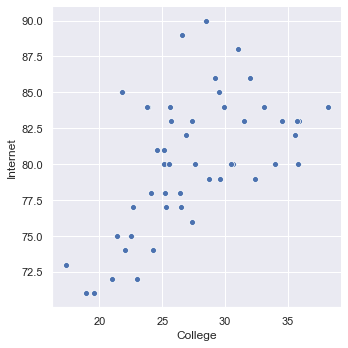

In [10]:
sb.relplot(x='College', y='Internet', data=USstates)

There appears to be a relationship between the variables. States that have more college graduates appear to also have higher internet usage. We can investigate this relationship in more detail by using **lmplot()** to plot the linear model. Not only do we get the regression line, but the plot also includes the 95% confidence interval.

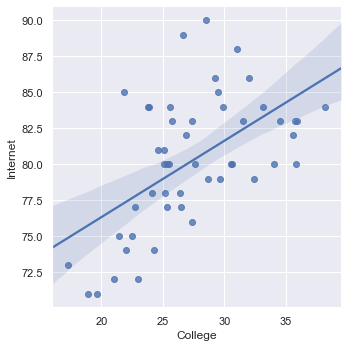

In [7]:
sb.lmplot(x='College', y='Internet', data=USstates)

We can introduce a control variable into our linear model by using the **hue** attribute. In this case, we'll compute the linear model separately for southern states and non-southern states. As you can see, the two regions show very different relationships as demonstrated by the distinct slopes. For non-southern states, there is a weak positive relationship between college attainment and internet usage. But for southern states, shown in blue, there is a strong positive relationship. The slope of the line for southern states is much steeper.

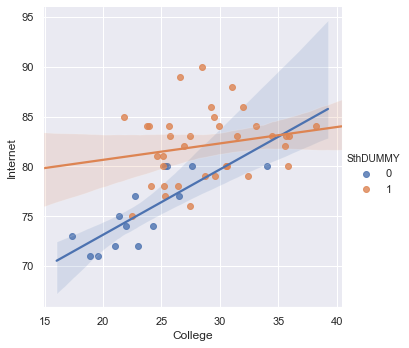

In [8]:
sb.lmplot(x='College', y='Internet', hue='SthDUMMY', data=USstates)

Let's look at this relationship in tabular form. We'll use the **statsmodels** library to compute the linear model.

In [21]:
Y = USstates.Internet
X = USstates[['College', 'SthDUMMY']]
model0 = sm.OLS(Y, X).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Internet   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              1052.
Date:                Wed, 11 Mar 2020   Prob (F-statistic):                    2.31e-40
Time:                        08:57:35   Log-Likelihood:                         -195.21
No. Observations:                  50   AIC:                                      394.4
Df Residuals:                      48   BIC:                                      398.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
College        2.9121      0.132     22.059      0.000       2.647       3.177
SthDUMMY      -1.9826      4.325     -0.458      0.649     -10.678       6.713
==============================================================================
Omnibus:                        3.194   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                3.058
Skew:                          -0.569   Prob(JB):                        0.217
Kurtosis:                       2.586   Cond. No.                         69.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can visualize the linear relationship using a different function **regplot()**. The computation is identical, but the graph is laid out differently, and often shows a linear model in a more accurate way. By convention, we plot linear models in rectangular format rather than square format. But you can use either tool.

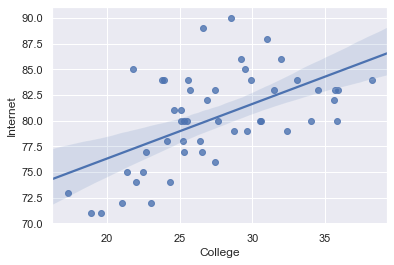

In [12]:
sb.regplot(x='College', y='Internet', data=USstates)

We can also use another plot to help us understand the relationship between the variables. Here, we're using **residplot()** to examine the residuals -- or errors of prediction -- in our model. That is, how do the predicted values of internet usage compare to the actual values of internet usage for the fifty states. The plot show that the errors are randomly distributed, some are positive and some are negative, but the distribution of positive and negative errors is similiar. It would be a problem for our model, for example if it tended to overestimate internet usage in states with low college attainment but underestimate it in states with high college attainment; in this case, the errors would not be random.

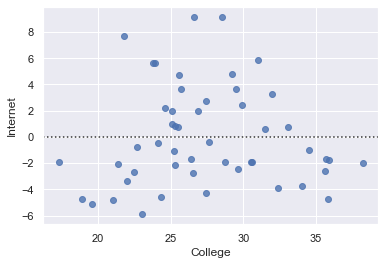

In [13]:
sb.residplot(x='College', y='Internet', data=USstates)